<a href="https://colab.research.google.com/github/isdeniz/msc-2024/blob/main/llama3_70b_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [2]:
!python3.10 -m pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [3]:
!python3.10 -m pip install langchain-core

In [4]:
!python3.10 -m pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.5 MB/s eta 0:00:00


In [5]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3:70b", num_ctx=8192, temperature=0)

In [6]:
pip install tqdm

In [7]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [8]:
test_sample = pd.read_pickle('data/set_p_llama.pkl')
print('Number of issues: ', test_sample.shape)

Number of issues:  (4222, 5)


In [9]:
test_sample.head()

,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final
0,"qssh: function key f1 broken in iTerm2 when ""R...",Other keys affected as well.,bug,bug,bug
2,[Feature Request] Int arrray,Deswegen,enhancement,enhancement,enhancement
4,In bibliography module sort menu change Author...,"Could we change ""Author"" here to ""Author/Edito...",enhancement,enhancement,enhancement
5,Move to docker,Use Docker to build local stuff,enhancement,enhancement,enhancement
6,Blog Post,## Description\n\n### User Story\n\n- When I c...,enhancement,enhancement,enhancement


In [10]:
test_sample = test_sample.reset_index(drop = False)

In [11]:
test_sample.head()

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final
0,0,"qssh: function key f1 broken in iTerm2 when ""R...",Other keys affected as well.,bug,bug,bug
1,2,[Feature Request] Int arrray,Deswegen,enhancement,enhancement,enhancement
2,4,In bibliography module sort menu change Author...,"Could we change ""Author"" here to ""Author/Edito...",enhancement,enhancement,enhancement
3,5,Move to docker,Use Docker to build local stuff,enhancement,enhancement,enhancement
4,6,Blog Post,## Description\n\n### User Story\n\n- When I c...,enhancement,enhancement,enhancement


Run for all issues :)

In [12]:
s = test_sample.shape[0] // 1000
print(s)

4


In [13]:
x = 1
i = 0

while x < (s+1):
    i = (x - 1) * 1000
    n = x * 1000
    with tqdm(total = (n - i), ncols = 100) as pbar:
        while i < n:
            try:
                test_sample.loc[i,'llama3_70b_prediction'] = llm.invoke(f"""Classify the following issue as "bug", "enhancement", "question" or "other" and rate your classification confidence and issue understandability in range 0 - 100. Your answer should only include:
Classification: your classification answer
Prediction Confidence: your level of confidence
Issue Understandability: level of understandability
Do not provide any explanation.
Issue Title: {test_sample.loc[i,'original_issue_title']}
Issue Body: {test_sample.loc[i,'original_issue_body']}
""")
                pbar.update(1)
                i = i + 1
            except:
                print('exception')
                continue
    test_sample.to_pickle('data/set_p_llama_70b_preds.pkl')
    print(f'Categorization of {n} issues is complete')
    x = x + 1

100%|█████████████████████████████████████████████████████████| 1000/1000 [1:04:10<00:00,  3.85s/it]


Categorization of 1000 issues is complete


100%|█████████████████████████████████████████████████████████| 1000/1000 [1:03:22<00:00,  3.80s/it]


Categorization of 2000 issues is complete


100%|█████████████████████████████████████████████████████████| 1000/1000 [1:01:40<00:00,  3.70s/it]


Categorization of 3000 issues is complete


100%|█████████████████████████████████████████████████████████| 1000/1000 [1:04:45<00:00,  3.89s/it]

Categorization of 4000 issues is complete


In [14]:
print(x)

5


In [15]:
i = (x - 1) * 1000
n = test_sample.shape[0]
with tqdm(total = (n - i), ncols = 100) as pbar:
  while i < n:
    try:
      test_sample.loc[i,'llama3_70b_prediction'] = llm.invoke(f"""Classify the following issue as "bug", "enhancement", "question" or "other" and rate your classification confidence and issue understandability in range 0 - 100. Your answer should only include:
Classification: your classification answer
Prediction Confidence: your level of confidence
Issue Understandability: level of understandability
Do not provide any explanation.
Issue Title: {test_sample.loc[i,'original_issue_title']}
Issue Body: {test_sample.loc[i,'original_issue_body']}
""")
      pbar.update(1)
      i = i + 1
    except:
      print('exception')
      continue

test_sample.to_pickle('data/set_p_llama_70b_preds.pkl')
print(f'Categorization of {n} issues are completed and saved')

100%|█████████████████████████████████████████████████████████████| 222/222 [13:46<00:00,  3.72s/it]

Categorization of 4222 issues are completed and saved


In [16]:
len(test_sample['llama3_70b_prediction'].unique())

71

In [17]:
test_sample.tail()

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_70b_prediction
4217,4995,Generate OpenGraph metatag,NaN,enhancement,enhancement,enhancement,Classification: enhancement\nPrediction Confid...
4218,4996,SCVM 상태조회시 nic정보 조회 방식 변경,## 개발 개요\nSCVM 상태조회시 nic정보 조회 방식 변경해야함.\n기존방식은...,enhancement,enhancement,enhancement,Classification: enhancement\nPrediction Confid...
4219,4997,Question: allow offline building,"I have no idea about how to code in Go, but I'...",question,question,enhancement,Classification: enhancement\nPrediction Confid...
4220,4998,Add ios_unsupported_pods,"Hi. Your code is working great, but I think th...",enhancement,enhancement,enhancement,Classification: enhancement\nPrediction Confid...
4221,4999,Is Data Center Version planned?,We are using Confluence Data Center Version 6....,question,enhancement,question,Classification: question\nPrediction Confidenc...


In [18]:
def parse_clf(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    c = ''
    for line in lines:
        if line.startswith('classification:'):
            c = line.split(':')[1].strip()
            break
    return c

def parse_conf(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    pc = ''
    for line in lines:
        if line.startswith('prediction confidence:'):
            pc = line.split(':')[1].strip()
            break
    return pc

def parse_understd(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    u = ''
    for line in lines:
        if line.startswith('issue understandability:'):
            u = line.split(':')[1].strip()
            break
    return u

In [19]:
test_sample['llama3_70b_classification'] = test_sample['llama3_70b_prediction'].apply(parse_clf)

In [20]:
test_sample['llama3_70b_classification'].value_counts()

,count
llama3_70b_classification,
bug,2187
enhancement,1826
question,186
other,11
,11
task list,1


In [26]:
test_sample[test_sample['llama3_70b_classification'] == 'task list']

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_70b_prediction,llama3_70b_classification,llama3_70b_confidence,llama3_70b_understandability
2868,3417,Review validation file,- [x] Check calculate hr and rr function and ...,enhancement,enhancement,other,Classification: task list\nPrediction Confiden...,task list,90,80


In [27]:
test_sample.loc[2868,'llama3_70b_prediction']

'Classification: task list\nPrediction Confidence: 90\nIssue Understandability: 80'

In [33]:
print(test_sample.loc[2868,'llama3_70b_prediction'])

Classification: task list
Prediction Confidence: 90
Issue Understandability: 80


In [28]:
test_sample.loc[2868,'llama3_70b_classification'] = 'other'

In [29]:
test_sample['llama3_70b_classification'].value_counts()

,count
llama3_70b_classification,
bug,2187
enhancement,1826
question,186
other,12
,11


In [21]:
test_sample['llama3_70b_confidence'] = test_sample['llama3_70b_prediction'].apply(parse_conf)

In [22]:
test_sample['llama3_70b_confidence'].value_counts()

,count
llama3_70b_confidence,
90,2596
100,771
95,460
80,382
,11
<|begin_of_text|>201,1
70,1


In [30]:
test_sample[test_sample['llama3_70b_confidence'] == '<|begin_of_text|>201']

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_70b_prediction,llama3_70b_classification,llama3_70b_confidence,llama3_70b_understandability
155,200,Accessing property on embedded document via do...,"#### Sonata packages\n\n```javascript\n ""re...",bug,bug,bug,Classification: bug\nPrediction Confidence: <|...,bug,<|begin_of_text|>201,80


In [37]:
print(test_sample.loc[155,'llama3_70b_prediction'])

Classification: bug
Prediction Confidence: <|begin_of_text|>201
Issue Understandability: 80


In [38]:
print(test_sample.loc[155,'original_issue_title'])

Accessing property on embedded document via dot-notation works with filters but not list view


In [39]:
print(test_sample.loc[155,'original_issue_body'])

#### Sonata packages

```javascript
    "require": {
        "php": "^7.4",
        "ext-ctype": "*",
        "ext-iconv": "*",
        "sonata-project/admin-bundle": "dev-master#c8fc9cc6fc0ad08a2f6fc56bfb644e72f7fe033e",
        "sonata-project/doctrine-mongodb-admin-bundle": "dev-master",
        "symfony/apache-pack": "^1.0",
        "symfony/console": "5.2.*",
        "symfony/dotenv": "5.2.*",
        "symfony/flex": "^1.3.1",
        "symfony/framework-bundle": "5.2.*",
        "symfony/yaml": "5.2.*"
    },
```

The `SonataAdminBundle` is currently being prepared for Symfony **5**. As @VincentLanglet states:

> The persistence bundle are not up-to-date with the latest changes from SonataAdmin.

https://github.com/sonata-project/SonataAdminBundle/pull/6476#issuecomment-800249328

That is why I use the recommended commit which worked fine for installing this bundle.

He also added:

> I recommend you to fix the doctrine mongodb admin bundle commit too.

If I understood correctly t

In [40]:
test_sample.loc[155,'original_issue_body']

'#### Sonata packages\n\n```javascript\n    "require": {\n        "php": "^7.4",\n        "ext-ctype": "*",\n        "ext-iconv": "*",\n        "sonata-project/admin-bundle": "dev-master#c8fc9cc6fc0ad08a2f6fc56bfb644e72f7fe033e",\n        "sonata-project/doctrine-mongodb-admin-bundle": "dev-master",\n        "symfony/apache-pack": "^1.0",\n        "symfony/console": "5.2.*",\n        "symfony/dotenv": "5.2.*",\n        "symfony/flex": "^1.3.1",\n        "symfony/framework-bundle": "5.2.*",\n        "symfony/yaml": "5.2.*"\n    },\n```\n\nThe `SonataAdminBundle` is currently being prepared for Symfony **5**. As @VincentLanglet states:\n\n> The persistence bundle are not up-to-date with the latest changes from SonataAdmin.\n\nhttps://github.com/sonata-project/SonataAdminBundle/pull/6476#issuecomment-800249328\n\nThat is why I use the recommended commit which worked fine for installing this bundle.\n\nHe also added:\n\n> I recommend you to fix the doctrine mongodb admin bundle commit too.

In [41]:
def remove_backticks(text):
    return text.replace('`', '')

In [42]:
a = test_sample.loc[155,'original_issue_body']
test_sample.loc[155,'original_issue_body'] = remove_backticks(a)

In [43]:
i = 155
test_sample.loc[i,'llama3_70b_prediction'] = llm.invoke(f"""Classify the following issue as "bug", "enhancement", "question" or "other" and rate your classification confidence and issue understandability in range 0 - 100. Your answer should only include:
Classification: your classification answer
Prediction Confidence: your level of confidence
Issue Understandability: level of understandability
Do not provide any explanation.
Issue Title: {test_sample.loc[i,'original_issue_title']}
Issue Body: {test_sample.loc[i,'original_issue_body']}
""")

In [44]:
print(test_sample.loc[i,'llama3_70b_prediction'])

Classification: bug
Prediction Confidence: 90
Issue Understandability: 80


In [45]:
test_sample.loc[155,'llama3_70b_confidence'] = '90'

In [46]:
test_sample['llama3_70b_classification'].value_counts()

,count
llama3_70b_classification,
bug,2187
enhancement,1826
question,186
other,12
,11


In [47]:
test_sample['llama3_70b_confidence'].value_counts()

,count
llama3_70b_confidence,
90,2597
100,771
95,460
80,382
,11
70,1


In [48]:
test_sample['llama3_70b_understandability'].value_counts()

,count
llama3_70b_understandability,
95,1442
80,1233
90,1103
50,118
20,111
60,111
100,48
70,29
40,15


In [23]:
test_sample['llama3_70b_understandability'] = test_sample['llama3_70b_prediction'].apply(parse_understd)

In [24]:
test_sample['llama3_70b_understandability'].value_counts()

,count
llama3_70b_understandability,
95,1442
80,1232
90,1103
50,118
20,111
60,111
100,48
70,29
40,15


In [31]:
test_sample[test_sample['llama3_70b_understandability'] == 'of 80']

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_70b_prediction,llama3_70b_classification,llama3_70b_confidence,llama3_70b_understandability
1014,1255,Task update ROLLBACK,I configured a cron every minute like this `* ...,bug,bug,bug,Classification: bug\nPrediction Confidence: 90...,bug,90,of 80


In [32]:
test_sample.loc[1014,'llama3_70b_prediction']

'Classification: bug\nPrediction Confidence: 90\nIssue Understandability:  of 80'

In [34]:
print(test_sample.loc[1014,'llama3_70b_prediction'])

Classification: bug
Prediction Confidence: 90
Issue Understandability:  of 80


In [35]:
test_sample.loc[1014,'llama3_70b_understandability'] = '80'

In [36]:
test_sample['llama3_70b_understandability'].value_counts()

,count
llama3_70b_understandability,
95,1442
80,1233
90,1103
50,118
20,111
60,111
100,48
70,29
40,15


In [49]:
test_sample[test_sample['llama3_70b_classification'] == '']

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_70b_prediction,llama3_70b_classification,llama3_70b_confidence,llama3_70b_understandability
531,675,from the cloud about adding cleaning. try unde...,Hibernate:\nJan 28 04:27:42 ip-172-31-32-174 w...,bug,question,bug,"I would classify this issue as a ""bug"".\n\nThe...",,,
757,947,ufuzz failure,```js\n// original code\n// (beautified)\nvar ...,bug,enhancement,question,A code obfuscation challenge!\n\nAfter analyzi...,,,
1012,1253,Unable to switch kernels Jupyter VS Code MacOS,<!-- Please search existing issues to avoid cr...,bug,bug,bug,"I would classify this issue as ""other"". The te...",,,
1290,1581,map-reduce example irregularly fails to retrie...,## Summary \nRecently upgraded to argo v3.0.0-...,bug,bug,bug,"I would classify this issue as a ""bug"". The lo...",,,
1825,2208,Chat translator does not work,\n## Description\nWhat's wrong?\nI am unable t...,bug,question,bug,"I would classify this issue as a ""bug"".\n\nHer...",,,
1951,2353,LND doens't properly start. Keeps crashing..,**Describe the bug**\nKind of 'suddenly' i cou...,bug,bug,bug,"I would classify this issue as a ""bug"".\n\nHer...",,,
3634,4303,Segfault on startup macOS 11.2.2,<!--\nBefore reporting please do :\n\nUpdate y...,bug,bug,bug,"This is not a bug, enhancement, or question, b...",,,
3637,4308,[package] xz_utils/5.2.5: build fails on AppVe...,<!-- \n Please don't forget to update the iss...,bug,bug,bug,"A Conan build error!\n\nThis is a ""bug"" issue,...",,,
3831,4543,Error in `julia': double free or corruption (o...,"**Describe the bug**\nWhile using DiffEqFlux, ...",bug,bug,bug,"I've classified this issue as a ""bug"" because ...",,,
3894,4615,Issue creating venv,Had a `mu_venv` already present and working fr...,bug,enhancement,bug,Another interesting error!\n\nIt looks like we...,,,


In [50]:
test_sample.loc[531,'llama3_70b_classification'] = 'question'
test_sample.loc[531,'llama3_70b_confidence'] = '80'
test_sample.loc[531,'llama3_70b_understandability'] = '90'

test_sample.loc[757,'llama3_70b_classification'] = 'enhancement'
test_sample.loc[757,'llama3_70b_confidence'] = '20'
test_sample.loc[757,'llama3_70b_understandability'] = '80'

test_sample.loc[1012,'llama3_70b_classification'] = 'bug'
test_sample.loc[1012,'llama3_70b_confidence'] = '80'
test_sample.loc[1012,'llama3_70b_understandability'] = '90'

test_sample.loc[1290,'llama3_70b_classification'] = 'bug'
test_sample.loc[1290,'llama3_70b_confidence'] = '80'
test_sample.loc[1290,'llama3_70b_understandability'] = '90'

test_sample.loc[1825,'llama3_70b_classification'] = 'question'
test_sample.loc[1825,'llama3_70b_confidence'] = '80'
test_sample.loc[1825,'llama3_70b_understandability'] = '90'

test_sample.loc[1951,'llama3_70b_classification'] = 'bug'
test_sample.loc[1951,'llama3_70b_confidence'] = '80'
test_sample.loc[1951,'llama3_70b_understandability'] = '90'

test_sample.loc[3634,'llama3_70b_classification'] = 'bug'
test_sample.loc[3634,'llama3_70b_confidence'] = '80'
test_sample.loc[3634,'llama3_70b_understandability'] = '90'

test_sample.loc[3637,'llama3_70b_classification'] = 'bug'
test_sample.loc[3637,'llama3_70b_confidence'] = '80'
test_sample.loc[3637,'llama3_70b_understandability'] = '90'

test_sample.loc[3831,'llama3_70b_classification'] = 'bug'
test_sample.loc[3831,'llama3_70b_confidence'] = '90'
test_sample.loc[3831,'llama3_70b_understandability'] = '95'

test_sample.loc[3894,'llama3_70b_classification'] = 'enhancement'
test_sample.loc[3894,'llama3_70b_confidence'] = '80'
test_sample.loc[3894,'llama3_70b_understandability'] = '90'

test_sample.loc[4149,'llama3_70b_classification'] = 'bug'
test_sample.loc[4149,'llama3_70b_confidence'] = '80'
test_sample.loc[4149,'llama3_70b_understandability'] = '90'

In [51]:
test_sample['llama3_70b_classification'].value_counts()

,count
llama3_70b_classification,
bug,2194
enhancement,1828
question,188
other,12


In [52]:
test_sample['llama3_70b_confidence'].value_counts()

,count
llama3_70b_confidence,
90,2598
100,771
95,460
80,391
70,1
20,1


In [53]:
test_sample['llama3_70b_understandability'].value_counts()

,count
llama3_70b_understandability,
95,1443
80,1234
90,1112
50,118
20,111
60,111
100,48
70,29
40,15


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

original_labels = test_sample['issue_label']
predicted_labels = test_sample['llama3_70b_classification']

all_classes = sorted(set(original_labels) | set(predicted_labels))

confusion_matrix = confusion_matrix(original_labels, predicted_labels, labels=all_classes)

class_report = classification_report(original_labels, predicted_labels, target_names=all_classes, digits=4)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=all_classes, columns=all_classes)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


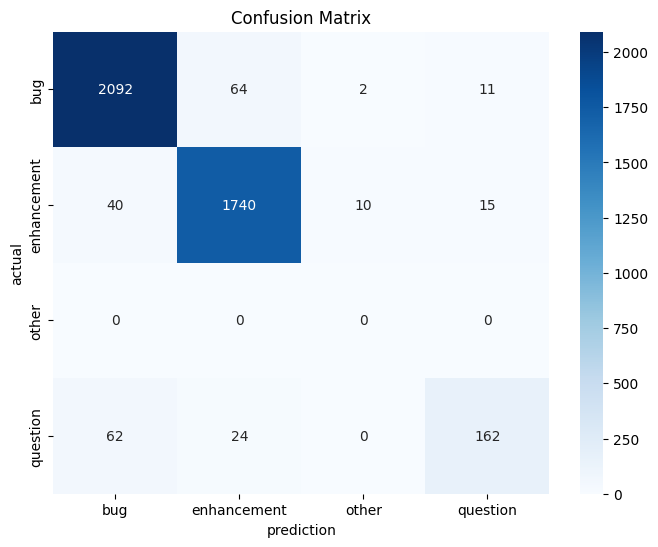

In [56]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
print(class_report)

              precision    recall  f1-score   support

         bug     0.9535    0.9645    0.9590      2169
 enhancement     0.9519    0.9640    0.9579      1805
       other     0.0000    0.0000    0.0000         0
    question     0.8617    0.6532    0.7431       248

    accuracy                         0.9460      4222
   macro avg     0.6918    0.6454    0.6650      4222
weighted avg     0.9474    0.9460    0.9458      4222

